In [1]:
import xarray as xr
import numpy as np

import xwmb
import xwmt
import xgcm
import warnings
warnings.filterwarnings('ignore')

In [2]:
xwmb.__version__, xwmt.__version__, xgcm.__version__

('0.0.1', '0.0.3', '0.8.2.dev15+g7492277')

In [3]:
hfdrake_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/data_daily/"
ds = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily.*.nc", chunks={"time":1})

In [4]:
snap = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily_snap*.nc", chunks={"time":1})
snap

<xarray.Dataset>
Dimensions:   (time: 1460, zl: 75, yh: 130, xh: 269)
Coordinates:
  * time      (time) object 0186-01-02 00:00:00 ... 0190-01-01 00:00:00
  * xh        (xh) float64 -137.9 -137.7 -137.4 -137.2 ... -70.41 -70.16 -69.91
  * yh        (yh) float64 10.2 10.44 10.69 10.93 ... 38.48 38.68 38.87 39.07
  * zl        (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
Data variables:
    rhopot2   (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thetao    (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thkcello  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    volcello  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    zos       (time, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
Attributes:
    filename:          01860101.ocean_daily_snap.nc
    title:             CM4_piControl_C_restartyear186
    associated_files:  areacello: 01860101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           Tue Mar 26 12:35:47 2024: ncks -v rhopot2 -d xh,650,91...
    NCO:               netCDF Operators version 5.0.1 (Homepage = http://nco....

In [5]:
static = xr.open_dataset("/pub/hfdrake/datasets/CM4_MHW_blobs/data/WMT_monthly/ocean_month_rho2.static.nc")#chunks={'time':1})
static

<xarray.Dataset>
Dimensions:       (yh: 1080, xh: 1440, yq: 1080, xq: 1440)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables: (12/27)
    geolat        (yh, xh) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    ...            ...
    sftof         (yh, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v         (yq, xh) float32 ...
    basin         (yh, xh) int32 ...
Attributes:
    external_variables:  areacello areacello

In [6]:
# Merge snapshots with time-averages
snap = snap.rename({
    **{'time':'time_bounds'},
    **{v:f"{v}_bounds" for v in snap.data_vars}
})
ds = xr.merge([ds.sel(time=ds.time[1:]), snap])

In [7]:
ds

<xarray.Dataset>
Dimensions:                         (time: 1459, xh: 269, yh: 130, zl: 75,
                                     xq: 270, yq: 131, time_bounds: 1460)
Coordinates:
  * time                            (time) object 0186-01-02 12:00:00 ... 018...
  * xh                              (xh) float64 -137.9 -137.7 ... -70.16 -69.91
  * yh                              (yh) float64 10.2 10.44 ... 38.87 39.07
  * zl                              (zl) float64 1.0 3.0 ... 3.591e+03 5.111e+03
  * xq                              (xq) float64 -137.8 -137.6 ... -69.76 -69.51
  * yq                              (yq) float64 10.32 10.56 ... 39.16 39.36
  * time_bounds                     (time_bounds) object 0186-01-02 00:00:00 ...
Data variables: (12/27)
    S_advection_xy                  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    T_advection_xy                  (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    T_adx                           (time, zl, yh, xq) float32 dask.array<chunksize=(1, 75, 130, 270), meta=np.ndarray>
    T_ady                           (time, zl, yq, xh) float32 dask.array<chunksize=(1, 75, 131, 269), meta=np.ndarray>
    Th_tendency_vert_remap          (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    boundary_forcing_h_tendency     (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    ...                              ...
    wfo                             (time, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
    rhopot2_bounds                  (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thetao_bounds                   (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thkcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    volcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    zos_bounds                      (time_bounds, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
Attributes:
    filename:          01860101.ocean_daily.nc
    title:             CM4_piControl_C_restartyear186
    associated_files:  areacello: 01860101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           Wed Mar 20 15:17:19 2024: ncks -v S_advection_xy -d xh...
    NCO:               netCDF Operators version 5.0.1 (Homepage = http://nco....

In [8]:
ds = xr.merge([static,ds],join='inner')

In [9]:
ds.d

<xarray.Dataset>
Dimensions:                         (xh: 269, xq: 270, yh: 130, yq: 131,
                                     time: 1459, zl: 75, time_bounds: 1460)
Coordinates:
  * xh                              (xh) float64 -137.9 -137.7 ... -70.16 -69.91
  * xq                              (xq) float64 -137.8 -137.6 ... -69.76 -69.51
  * yh                              (yh) float64 10.2 10.44 ... 38.87 39.07
  * yq                              (yq) float64 10.32 10.56 ... 39.16 39.36
  * time                            (time) object 0186-01-02 12:00:00 ... 018...
  * zl                              (zl) float64 1.0 3.0 ... 3.591e+03 5.111e+03
  * time_bounds                     (time_bounds) object 0186-01-02 00:00:00 ...
Data variables: (12/54)
    geolat                          (yh, xh) float32 ...
    geolat_c                        (yq, xq) float32 ...
    geolon                          (yh, xh) float32 ...
    geolon_c                        (yq, xq) float32 ...
    Coriolis                        (yq, xq) float32 ...
    areacello                       (yh, xh) float32 ...
    ...                              ...
    wfo                             (time, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
    rhopot2_bounds                  (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thetao_bounds                   (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thkcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    volcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    zos_bounds                      (time_bounds, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
Attributes:
    external_variables:  areacello areacello

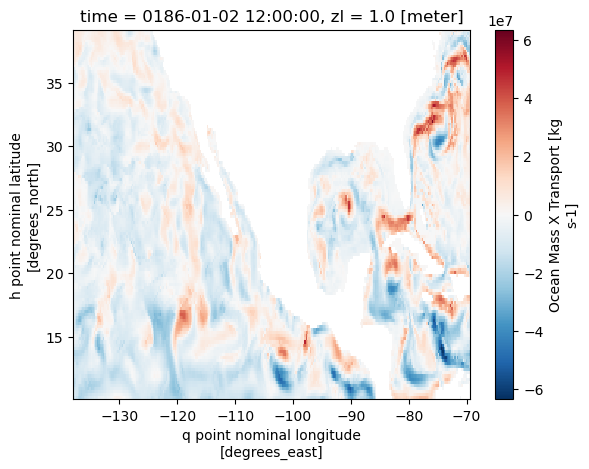

In [12]:
ds.umo.isel(time=0,zl=0).plot()

In [ ]:
ds

In [13]:
def add_estimated_layer_interfaces(ds):
    return ds.assign_coords({"zi": xr.DataArray(
        np.concatenate([[0], 0.5*(ds.zl.values[1:]+ds.zl.values[0:-1]), [6000]]),
        dims=('zi',)
    )})

In [14]:
ds = add_estimated_layer_interfaces(ds) 

In [15]:
# Add core coordinates of static to ds
# #ds = ds.assign_coords({
#     "areacello": xr.DataArray(static["areacello"].values, dims=('yh', 'xh',)), # Required for area-integration
#     "lon": xr.DataArray(static["geolon"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
#     "lat": xr.DataArray(static["geolat"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
#     "xq": xr.DataArray(static["xq"].values, dims=('xq',)),
#     "yq": xr.DataArray(static["yq"].values, dims=('yq',)),
#     "deptho": xr.DataArray(static["deptho"].values, dims=('yh', 'xh',)),
#     "geolon": xr.DataArray(static["geolon"].values, dims=('yh', 'xh',)),
#     "geolat": xr.DataArray(static["geolat"].values, dims=('yh', 'xh',)),
#     "geolon_c": xr.DataArray(static["geolon_c"].values, dims=('yq', 'xq',)),
#     "geolat_c": xr.DataArray(static["geolat_c"].values, dims=('yq', 'xq',)),
# })

# xgcm grid for dataset
coords = {
    'X': {'center': 'xh', 'outer': 'xq'},
    'Y': {'center': 'yh', 'outer': 'yq'},
    'Z': {'center': 'zl', 'outer': 'zi'}
}
#'Z': {'center': 'rho2_l', 'outer': 'rho2_i'}
#'Z': {'center': 'zl', 'outer': 'zl'}
metrics = {
    ('X','Y'): "areacello", # Required for area-integration
}

ds['tos'] = ds['thetao'].isel(zl=0)
#ds['sos'] = ds['so'].isel(zl=0)

grid = xgcm.Grid(ds.copy(), coords=coords, metrics=metrics, boundary={'X':'extend', 'Y':'extend', 'Z':'extend'}, autoparse_metadata=False)

In [16]:
wm = xwmt.WaterMass(grid)

In [19]:
wm.grid._ds

<xarray.Dataset>
Dimensions:                         (xh: 269, xq: 270, yh: 130, yq: 131,
                                     time: 1459, zl: 75, time_bounds: 1460,
                                     zi: 76)
Coordinates:
  * xh                              (xh) float64 -137.9 -137.7 ... -70.16 -69.91
  * xq                              (xq) float64 -137.8 -137.6 ... -69.76 -69.51
  * yh                              (yh) float64 10.2 10.44 ... 38.87 39.07
  * yq                              (yq) float64 10.32 10.56 ... 39.16 39.36
  * time                            (time) object 0186-01-02 12:00:00 ... 018...
  * zl                              (zl) float64 1.0 3.0 ... 3.591e+03 5.111e+03
  * time_bounds                     (time_bounds) object 0186-01-02 00:00:00 ...
  * zi                              (zi) float64 0.0 2.0 4.0 ... 4.351e+03 6e+03
Data variables: (12/56)
    geolat                          (yh, xh) float32 ...
    geolat_c                        (yq, xq) float32 ...
    geolon                          (yh, xh) float32 ...
    geolon_c                        (yq, xq) float32 ...
    Coriolis                        (yq, xq) float32 ...
    areacello                       (yh, xh) float32 ...
    ...                              ...
    thetao_bounds                   (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    thkcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    volcello_bounds                 (time_bounds, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    zos_bounds                      (time_bounds, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
    tos                             (time, yh, xh) float32 dask.array<chunksize=(1, 130, 269), meta=np.ndarray>
    thkcello_i                      (time, yh, xh, zi) float32 dask.array<chunksize=(1, 130, 269, 76), meta=np.ndarray>
Attributes:
    external_variables:  areacello areacello

In [23]:
import xbudget
budgets_dict = xbudget.load_preset_budget(model="MOM6_3Donly").copy()
del budgets_dict['salt']['lhs']
del budgets_dict['salt']['rhs']

In [24]:
budgets_dict

{'mass': {'lambda': 'density',
  'thickness': 'thkcello',
  'transport': {'X': 'umo', 'Y': 'vmo'},
  'lhs': {'var': None, 'sum': {'var': None, 'Eulerian_tendency': None}},
  'rhs': {'var': None,
   'sum': {'var': None,
    'advection': None,
    'surface_exchange_flux': {'var': None,
     'product': {'var': None,
      'thickness_tendency': 'boundary_forcing_h_tendency',
      'density': 1035.0}}}}},
 'heat': {'lambda': 'thetao',
  'surface_lambda': 'tos',
  'lhs': {'var': None,
   'sum': {'var': None,
    'Eulerian_tendency': 'opottemptend',
    'advection': {'var': None,
     'sum': {'var': None,
      'lateral': {'var': None,
       'product': {'var': None,
        'sign': -1.0,
        'convergence': 'T_advection_xy'}},
      'interfacial': {'var': None,
       'product': {'var': None,
        'sign': -1.0,
        'convergence': 'Th_tendency_vert_remap'}}}},
    'surface_ocean_flux_advective_negative_lhs': {'var': None,
     'product': {'var': None,
      'sign': -1.0,
      'spec

In [25]:
xbudget.collect_budgets(grid._ds, budgets_dict)

In [26]:
grid._ds

<xarray.Dataset>
Dimensions:                                                         (xh: 269,
                                                                     xq: 270,
                                                                     yh: 130,
                                                                     yq: 131,
                                                                     time: 1459,
                                                                     zl: 75,
                                                                     time_bounds: 1460,
                                                                     zi: 76)
Coordinates:
  * xh                                                              (xh) float64 ...
  * xq                                                              (xq) float64 ...
  * yh                                                              (yh) float64 ...
  * yq                                                              (yq) float64 ...
  * time                                                            (time) object ...
  * zl                                                              (zl) float64 ...
  * time_bounds                                                     (time_bounds) object ...
  * zi                                                              (zi) float64 ...
Data variables: (12/87)
    geolat                                                          (yh, xh) float32 ...
    geolat_c                                                        (yq, xq) float32 ...
    geolon                                                          (yh, xh) float32 ...
    geolon_c                                                        (yq, xq) float32 ...
    Coriolis                                                        (yq, xq) float32 ...
    areacello                                                       (yh, xh) float32 ...
    ...                                                              ...
    heat_rhs_sum_surface_exchange_flux                              (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    mass_rhs_sum_surface_exchange_flux                              (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    heat_rhs_sum_surface_ocean_flux_advective_negative_rhs_product  (time, yh, xh, zl) float32 dask.array<chunksize=(1, 130, 269, 75), meta=np.ndarray>
    heat_rhs_sum_surface_ocean_flux_advective_negative_rhs          (time, yh, xh, zl) float32 dask.array<chunksize=(1, 130, 269, 75), meta=np.ndarray>
    heat_rhs_sum                                                    (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
    heat_rhs                                                        (time, zl, yh, xh) float32 dask.array<chunksize=(1, 75, 130, 269), meta=np.ndarray>
Attributes:
    external_variables:  areacello areacello

In [27]:
budgets_dict

{'mass': {'lambda': 'density',
  'thickness': 'thkcello',
  'transport': {'X': 'umo', 'Y': 'vmo'},
  'lhs': {'var': None, 'sum': {'var': None, 'Eulerian_tendency': None}},
  'rhs': {'var': None,
   'sum': {'var': 'mass_rhs_sum',
    'advection': None,
    'surface_exchange_flux': {'var': 'mass_rhs_sum_surface_exchange_flux',
     'product': {'var': 'mass_rhs_sum_surface_exchange_flux_product',
      'thickness_tendency': 'boundary_forcing_h_tendency',
      'density': 1035.0}}}}},
 'heat': {'lambda': 'thetao',
  'surface_lambda': 'tos',
  'lhs': {'var': None,
   'sum': {'var': 'heat_lhs_sum',
    'Eulerian_tendency': 'opottemptend',
    'advection': {'var': None,
     'sum': {'var': 'heat_lhs_sum_advection_sum',
      'lateral': {'var': None,
       'product': {'var': 'heat_lhs_sum_advection_sum_lateral_product',
        'sign': -1.0,
        'convergence': 'T_advection_xy'}},
      'interfacial': {'var': None,
       'product': {'var': 'heat_lhs_sum_advection_sum_interfacial_product',

In [ ]:
import numpy as np
import regionate
import matplotlib.pyplot as plt

# Note: the properties of this region are quite different from the rest of the Baltic!
name = "MANSO"
#lons = np.array([8.,   20.,  29., 24.5, 24.5, 26.1, 17.5, 11.5])
#lons = np.arange([-138, 0, 3.4])
lons = np.array([-138.,-120.,-100., -70., -70., -100., -120., -138.])
#lats = np.arange(8, 49, 1)
lats = np.array([10., 10., 10., 10., 38., 38., 38., 38.])
#lats = np.array([53.5, 53.5, 54.5,  59.,  61.,  63., 64.5,  62.])
manso_region = regionate.GriddedRegion(name, lons, lats, grid)

plt.figure(figsize=(4.75,3.5))
pc = plt.pcolor(
    grid._ds['geolon_c'],
    grid._ds['geolat_c'],
    grid._ds['deptho'],
    cmap="viridis_r"
)
plt.colorbar(pc, label="depth [m]")
plt.plot(regionate.loop(manso_region.lons), regionate.loop(manso_region.lats), color="k");
plt.xlabel("longitude");
plt.ylabel("latitude");
plt.xlim(np.min(lons), np.max(lons))
plt.ylim(np.min(lats), np.max(lats))

#plt.xlim(-200,5)
#plt.ylim(-10,80)

In [ ]:
budgets_dict

In [ ]:
import warnings

lam = "heat"
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    wmb = xwmb.WaterMassBudget(
        grid,
        budgets_dict,
        manso_region.mask
    )
    wmb.mass_budget(lam, greater_than=True, default_bins=True)
    #wmb.wmt.load()
    wmt = wmb.wmt
    

In [ ]:
wmt

In [ ]:
wmb.grid._ds